In [1]:
import numpy as np
import cv2
import pandas as pd
import os
import pickle

# Face Detection Model
- Load the models

In [2]:
face_detection_model = './models/res10_300x300_ssd_iter_140000.caffemodel'
face_detection_proto = './models/deploy.prototxt.txt'
face_descriptor = './models/openface.nn4.small2.v1.t7'
# load models using cv2 dnn
detector_model = cv2.dnn.readNetFromCaffe(face_detection_proto,face_detection_model)
descriptor_model = cv2.dnn.readNetFromTorch(face_descriptor)

In [3]:
!ls emotion_data

angry    disgust  fear     happy    neutral  sad      surprise


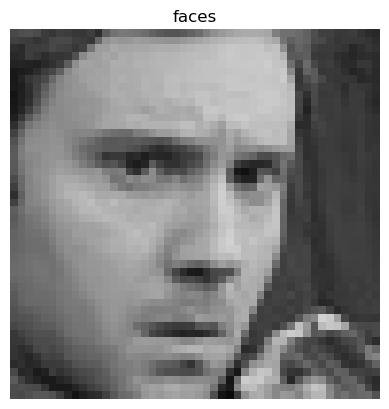

In [4]:
# consider sample image
img = cv2.imread('./emotion_data/angry/0.jpg')

import matplotlib.pyplot as plt

# Convert from BGR to RGB format
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display using matplotlib
plt.imshow(img_rgb)
plt.axis('off') # to hide the axis values
plt.title('faces')
plt.show()

In [5]:
def helper(image_path):
    img = cv2.imread(image_path)
    # step-1: face detection
    image = img.copy()
    h,w = image.shape[:2]
    img_blob = cv2.dnn.blobFromImage(image,1,(300,300),(104,177,123),swapRB=False,crop=False)
    # set the input
    detector_model.setInput(img_blob)
    detections = detector_model.forward()

    if len(detections) > 0:
        i = np.argmax(detections[0,0,:,2])# consider the face with max confidence score
        confidence = detections[0,0,i,2]
        if confidence > 0.5:
            box = detections[0,0,i,3:7]*np.array([w,h,w,h])
            (startx,starty,endx,endy) = box.astype('int')
            # step-2: Feature Extraction or Embedding
            roi = image[starty:endy,startx:endx].copy()
            # get the face descriptors
            faceblob = cv2.dnn.blobFromImage(roi,1/255,(96,96),(0,0,0),swapRB=True,crop=True)
            descriptor_model.setInput(faceblob)
            vectors = descriptor_model.forward()
            
            return vectors
    return None


# apply helper function to all images and get face descriptors

In [6]:
data = dict(data=[],label=[])

In [10]:
folders = [f for f in os.listdir('emotion_data') if os.path.isdir(os.path.join('emotion_data', f))]

for folder in folders:
    filenames = os.listdir('emotion_data/{}'.format(folder))
    for filename in filenames:
        try:

            vector = helper('./emotion_data/{}/{}'.format(folder,filename))
            if vector is not None:
                data['data'].append(vector)
                data['label'].append(folder)
                print('Feature Extracted Sucessfully')
                
        except:
            pass

Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Ex

Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Ex

Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Ex

Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Ex

Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Ex

Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Ex

In [11]:
data.keys()

dict_keys(['data', 'label'])

In [12]:
pd.Series(data['label']).value_counts()

happy       488
neutral     292
sad         260
fear        207
angry       189
surprise    181
disgust      40
Name: count, dtype: int64

In [13]:
# save the data
pickle.dump(data,open('data_face_features_emotion.pickle',mode='wb'))